In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_tweets.csv')

In [3]:
df.head()

Unnamed: 0  sentiment                                               text
0           0          0  awww that s a bummer you shoulda got david car...
1           1          0  is upset that he can not update his facebook b...
2           2          0  i dived many times for the ball managed to sav...
3           3          0     my whole body feels itchy and like its on fire
4           4          0  no it s not behaving at all i m mad why am i h...

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [5]:
df.describe()

sentiment
count  1.600000e+06
mean   2.000000e+00
std    2.000001e+00
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    4.000000e+00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
df[df['text'].isnull()].count()

sentiment    3286
text            0
dtype: int64

In [9]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
df2 = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols)

In [10]:
df2.iloc[df[df['text'].isnull()].index].head()

sentiment          id                          date query_string  \
208           0  1467863072  Mon Apr 06 22:33:25 PDT 2009     NO_QUERY   
249           0  1467874569  Mon Apr 06 22:36:27 PDT 2009     NO_QUERY   
398           0  1467912842  Mon Apr 06 22:46:53 PDT 2009     NO_QUERY   
430           0  1467919452  Mon Apr 06 22:48:48 PDT 2009     NO_QUERY   
1011          0  1468061127  Mon Apr 06 23:30:23 PDT 2009     NO_QUERY   

              user            text  
208       Artiel87      @mandayyy   
249       Artiel87    @mandayyy     
398   KimberlyKane  @danadearmond   
430      jtmal0723      @anistorm   
1011    gabysslave  @citizensheep

Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [11]:
df.dropna(inplace=True)

In [12]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1596714 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# Text Visualisation

### Word Cloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, 
                      max_font_size=40, random_state=42).generate(str(df['text']))

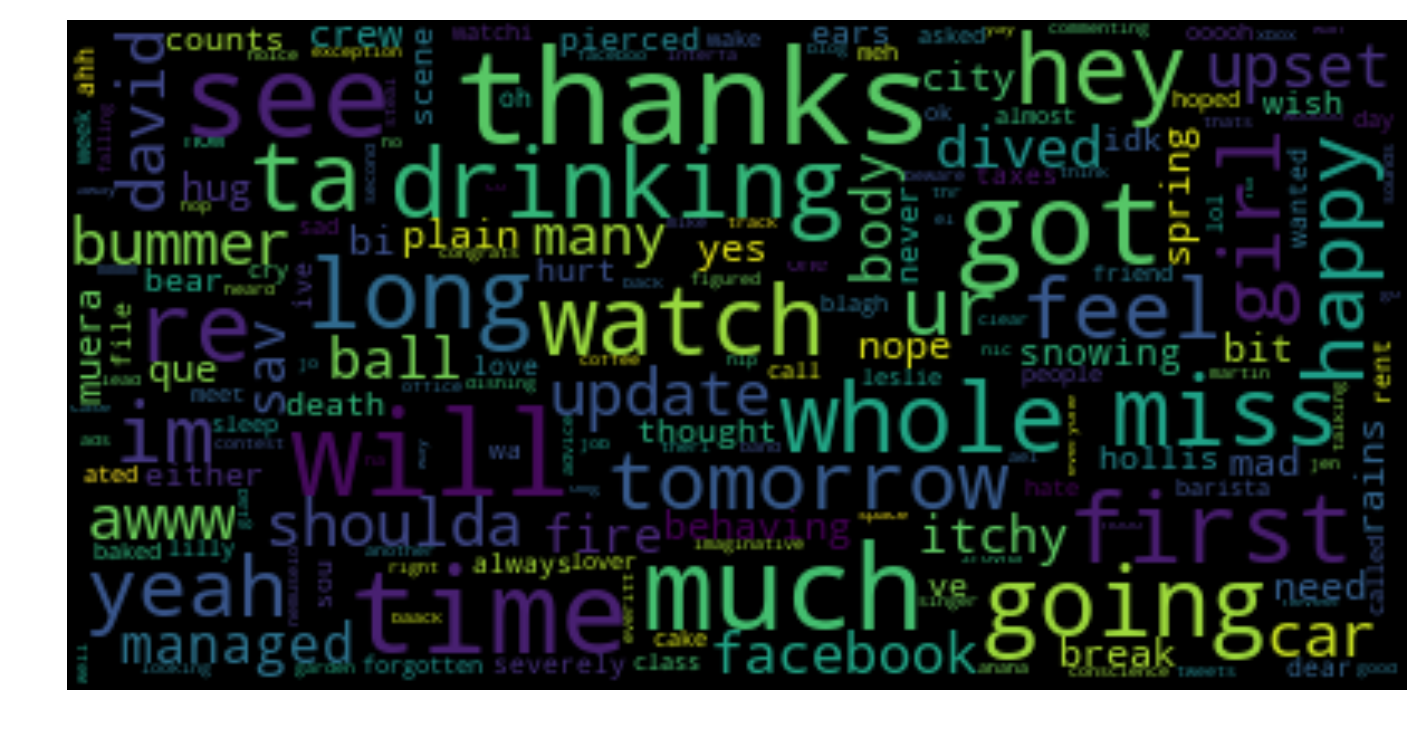

In [16]:
fig = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud consists of the words which have the highest frequency among all the tweets, positive and negative both.

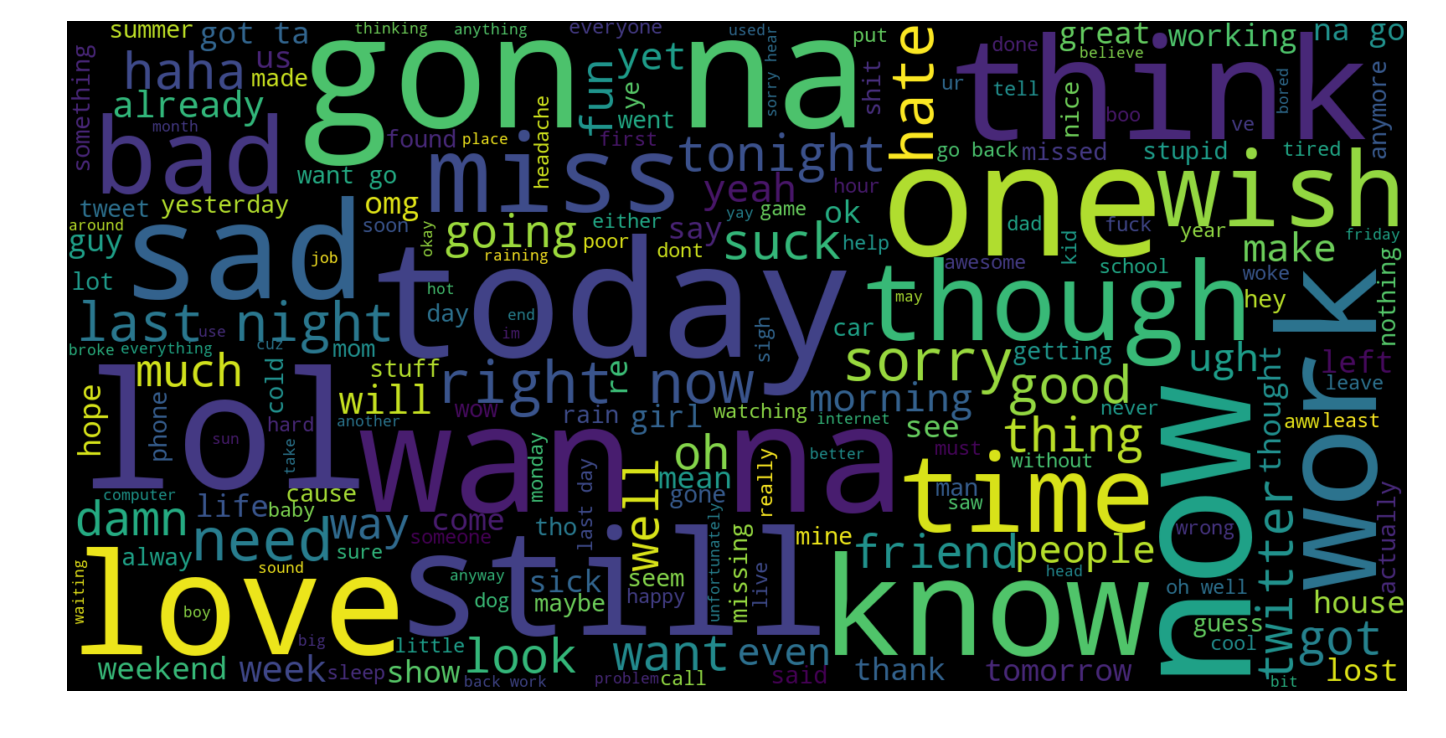

In [17]:
negative_tweets = df[df['sentiment']==0]

neg_tweet = []
for tweet in negative_tweets.text:
    neg_tweet.append(tweet)
neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
plt.figure(figsize=(12,10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some words, like, "today", "one", "still" can be termed as neutral. Words like, "sad", "bad", "hate", "suck", "wish" etc. make sense as negative words.

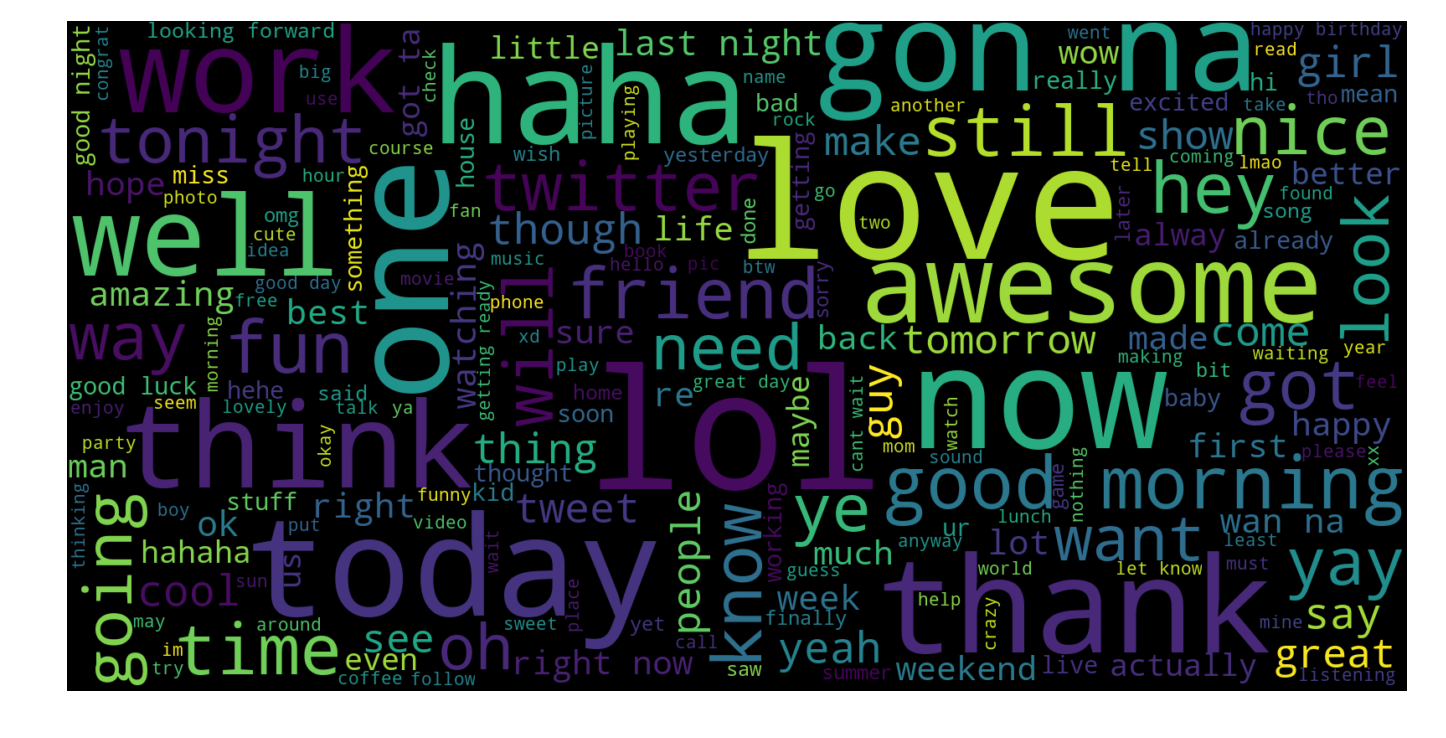

In [18]:
positive_tweets = df[df['sentiment']==1]

pos_tweet = []
for tweet in positive_tweets.text:
    pos_tweet.append(tweet)
pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
plt.figure(figsize=(12,10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this wordcloud of positive tweets, neutral words, like "today", "tonight", "still", etc are present. Also, words like "thank", "haha", "awesome", "good", etc stand out as the positive words.

Words like "today", "lol", "tonight", "still", "work" etc are common in both the positive and negative tweets. Hence, it can be concluded that people have both positive and negative response towards work and their day.

What I found surprising is the presence of "lol" and "love" in both the positive and the negative tweets wordclouds. So, now, I am going to inspect this.

In [25]:
count = 0
for tweet in negative_tweets.text:
    if 'love' in tweet:
        print(tweet)
        count = count + 1

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe i love you too am here i miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz i like what u do much love
i m missing you babe but as long as your alive i m happy ya i m tired my love imma try to sleep hopefully you had a headstart
love the french i tell people here in the south i m qtr french and they snarl at me french are beautiful people
ooh i m excited and not even going be there long love youtube
i m here friend and i love you
i wish i was sold out if you have some time let me know i would love to hear more about what you are up to
i love you buck
is in love with scrappy and is missin him already
glad i was able help you feel better i hate to see you sick love you
i love my atekinzz so much i soo miss her
stupid arranged marriages i ll convert so you can marry me love you
fuck omg austins always there tho

who s man drink today norma s trouble hey blisters happen b c sum will not take me glove shoppin
since i m def going to co for david byrne and we are driving guess no bte and tyrone love being on the road though
peek do not take it to heart love i m only jokinggg
so ya i m single but i still love her and ple loves me its just bad time
oh how i lovely boyfriend to bad he s gone imma get some chocolate chapstick then go he
i love it but not sure how extensively they re testing releases i can not see anybody in friendstacks either
oh well that s just lovely because i meant the ipod on my iphone not cheap
wishes she still loved him
i love my homeboys oh so mucho making me wan na stayyyyy
nooooooooo but i love yeewwww lol
would love to go outside but stuck doing homework cant wait for tomorrow night
why does no one like bionic commando online i love it more then any other multiplayer and no one wants to play
love things making me sick xd i can not sleep til shiz
i wish i knew who you were c

i m good up way past my bedtime though it s almost am est i m sure my lovely wife would like me in bed you
oh for the love of god move on been there done that not fun
this feeling wont go away whoever said love will never tear you apart needs a reality check
happy early mother s day spending the day in new york i miss miami goodnight love ya naomi
love other room yum chimay just got home from babyshower exhausted
leung would love to but have to move apt s that weekend have not packed yet
huer went to sleep and left me alone anyway i still love her haha
i love my mom wish i was home for mothers day
i told ya you d find random stuff in there love k mcphee s song but it s not on blip
my birthday party was great i love my friends totally lost my camera at ashtons a part of me is missing camera come back to me
oh noes dizziness go aways love you see you soon
todays goal try and ignore fact its a lovely day and complete all coursework making
saddest moment in life our beloved loyal listener 

sorry lover i was finished when i got home
u re not coming years waiting for this damned flu please do not forget us good luck with the latinamerican tour love u
what i love about going to concerts the live music what i m not a fan of are the cigarettes i woke up feeling like i smoked packs
beach fail i love the rain for the sweet sleep it gave me last night but seriously beach is my first love and sleep second
u re not coming years waiting for this damned flu please do not forget us good luck with the latinamerican tour love u
i just wan na show you she dont even know you never gon na love you like i want to
yeah shani s brain loves making her like guys she does not have a chance with
you were my first crush and my first love and i know that we ll always be meant for each other but why are we not together now
amen to that i love lost i can not watch it tho b c i have not been able to keep up have to wait until it comes out on dvd
ree they wont read the texts now they be getting ready 

loves summer bonfires but does not love having to be at work by am the next morning
loved the facebook webcast with the jonas brothers they didnt say hi though
crying right now becuse my mom is in the hospital staying over night i love you mom
sorry no funnies today tweeps still loves me
me tooo i love maxi dresses we did not have any luck finding any though
im sooo tired today gym killed me but i loved every minute of it lol he s been on my mind all day and i miss my mr amazing
oh and there was so much love between us just yesterday
no love on the hotel front ovr here givn me the runaround so far i getz no love wtf
so you can get to ya prince charming that s how i look at if a nigga can not love you for u then fuck him
codyross i would love to but i dont get off until
love the smell of yellow plumerias wish they would grow back home abc store plumeria sticks do not yield flowers
as u i would not eat those member i love duckies but i remember the margaritas yes indeed
well if tonight l

did it i scared myself though now enjoying my lovely free bottle of champagne thanks eurostar
aww i love to play with dogs thats so sweet i wish i had a dog
bearr dont spread yourself too thin i love you ion wan na see you get hurt
sad fact carbs is just as fattening as greasy meat dishes i m a living proof more to love i guess haha
sherekan s lovely and a cutie pie seriously i want my mona vet s gon na call us when she arrives
sad moment today woman stomped a spider my to daughter was admiring hope it did not ruin her love of insects arachnids
starting work now mulched the yard and wrote music all morning i need lyrics i love you baby girl
no love
i do not love you no mo
just missing my boyfriend so much i love you andr
oh shit i love and hate this song all at the same time
a you opened the bar huh sowwies well i have much to tell u so mybe u can look forward to that love u
theres so many i love on britains got talent i would never be able to choose
love him to death for real i d do a

well then oh you just had to go there with the prawns didnt you you know my hamster fell in love with one and ran away with it
i love my new eco friendly iced tumbler from but they use so many post its to write my drink order
i love you to bethany i miss you
oh oh man i got ta study i do not know why they love doing exams in my school it s like i finish them but
kristen happy birthday it sucks u got ta work today nathan and i would ve loved to take u out to lunch
i guess life us all about live and learn u so differ from me i learn not to fall in love so easily
tim is a douchebag and will not let me take part in his lovely nautical adventure
thanks miss i did not make the team they loved me but was concerned if i could quickly lose some lbs
edinburgh again it hot hot hot love it work was so busy today lol
i d love to but i m nowhere near a computer
is sad that it is coming to an end i had an amazing time with my loves i m going to remember every single minute
im going to the pub lol lov

i lovee driving my license picture is weird
note to all i love never touch the spoon that stirred the sugar that was carmelizing on the stove it s the burn that keeps on burning
ashleigh jaeden are in bed i love you aaron sorry for ending our phone call so quickly hope your not mad missing you way to much
one more show before they ve got to go i m dying to thank you all guys brazil loves you thanks for coming
tonight sucked my lover flew back to ca
perhaps that explains stadium love woot uploading shots now bet flickr uploadr is gon na mess with my upload orders
sister dont love me back
i loved the trailer it waas great great great just worried for edward fans moving to team jacob
hours at work to come home sleep and be no use lovely job
i love you beautiful
is in one of those i do not feel like doing homework moods blaah and i love my daddy very much xxo
why wont my profile picture show up its really frustrating and sad i loved my su fi
promithozon you my only friend caught a cold fro

dear insomnia please go away kthnxbai love kat
ahhh love me some sleep in but the tv shows in the morning sure sucks and the dark angel books i ordered from adlibris are delayed
morning i m walking to beach again this morn to make the most of the sun b it disappears got ta walk past shop with lovely shoes again
would love to but i m on a really tight deadline today can not take the time out next time for sure
i love my son at work right now
is tired now n missing my love ahhhhh
thx peace unfortunately you have to be a canadian resident to vote would love to be able to vote for agoo s designers but can not
id love to but i have to work then have dr apptmnt def another time
oh i just love insomnia now i know how feels
arrived fowa loverly day out good line up but no coffee yet
happy birthday sammy i love you so much and miss you tons
aww i love demi lovato and doesnt it just suck that ppl that say mean things get replys but me who loves this kid cant get
i love black hair even if i had a

love cuddling with my little guy he has a summer cold
i want to see him live as well but the tickets are way to expensive i love keep the faith x
finally got round to listing my beloved mm slr not sure if i m happy about this
lmao i know i m pathetic i forgot how i much loved them
downloading music on my new itunes library being that my other is on my broken laptop i love james morrison just to put that out there
my brother s girlfriend has had her baby his birthday is d day though lovely sarcasm
stafford aww would love to meet but i m too far away so it will never happen
i m working wish i could stop by i m at work until grrr love the farmers market and loved your stuff from top chef
concert pics from atl pretty much suck keep your head up i couldnt get one decent pic of you so sad love you
loveme haha hey tom look at this i love please reply me
tom look this photo is awesome i loveu please reply me argentina loves mcfly
a close to me jelous i m not going see u perform love the sats l

at my cousinns i love herrr i misss c tuggerah
hello again internet just back from dropping the lovely off at the airport after a fantastic week with her work tomo
will deplurk bye dad has to use the pc na ha i will be texting nalang vincent i love you so
just took colby watson brown to the airport love that boy gon na miss him
they skimped on the chocolate sauce but the beach was lovely every time i meditate after a break i remember why i should regularly
lol i love that name man they all use adobe air nvm i ll just be posting from web and tinytwitter
ok so i have to catch the bus home tommorow afternoon for some reason so it means i wont be able to see you sorry love you
stina have you watched any more oth as i am in love with james character he he miss you and carly loads xx
headache city not loves it
you lie l i love da site but the mods dont actually broadcast we were all very dissapointed
party last night was off the hook wholesome family fire entertainment and trapeze stuff i lo

missed your goodnight text rest well as i will love you always
as much as i love indian food i do not think my body is cool with it
please stop twittering about your enjoyment with my goods youre making me jealous i love you
in love with country girl by crosby stills nash young would link video but i can not find one
i follow perez i love him i wish i could go to the beach tomorrow sad but i got ta go study fuckkkk u
she s letting me down n the thing is she s who i want but there s no love
is at campus waiting for next class bpi without my love again
lovely sorry i had to bounce looked like a bomb went off in there see you bright and early
we would love for you too come no one believes me that you will show up
had a lovely day in the canoe yesterday back to work and reality today though via
geez got my social security number on ya too hahaha i love you boogah shnuggles just ain t the same
frannyb omg i fuggin love true blood i knew thqat creole dude was the one tryna kill sookie i miss

why are not you following no love for twilight dad
columbia gas digging ginormous holds in my street with jack hammers right now just lovely
gas company digging ginormous holes on my street with jackhammers just lovely
i love lady gaga but her music videos are getting worse and worse
twitter this is my first day what a way to welcome me no love
a i m so sorry sissy i would have loved to come see you we made these plans months ago and paid for hotel
have any tips for music writing i love to sing but i can not write my own stuff at all
suicide hello love of my life i finally got a stupid twitter hp imax got pushed back two weeks soo we have to see it regular
is gon na fix myself for school i love the rain but not at the moment
you should come to cocoa florida you know how many people down here would love you for that no one ever comes here
lovely morning in aberdeenshire shame i m in the taxi on my way to abz airport
lovely morning in aberdeenshire shame i m in the taxi on my way to abz 

i love dewey from malcolm in the middle he played fuzzy in cider house rules he died
bautista i love hp too can not wait until next movie but i dont know when it will be released in europe
beeeeeee happy trust me i was not in a happy mood either have not been for a bit idk but guess what i love you
having such a fab time did i mention i love cambridge and must i return to york tomorrow
i d also like to hug the loved ones of those who died in the recent air disaster they ve got it worse than any of us
it is raining i speak my mind i love st petersburg but i can not stand petersburg s weather
i m heeeeere walla bes i am so preoccupied i m sorryyy i love you guys
would love to however i m not at ndc and taking a plane now would not help
thinks that she is never ever loved more than a friend by toot
love is everywhere there s probably someone admiring you right now and you do not know it as for me i woke up tired today
love hurts that is unbelievable o allah help mom
aww love you tooo bro 

funny how ppl we sometimes love so much can cause so much chaos that s when u know it s time to let them go fam or long time friend
i miss you i want see you now please dougie i love you more and more everyday
wish there was a in soho starbucks does not do the trick plus i love d d
golfing with my cousin and old childhood friends rough day so far but love the company
how can you hate me i love you
di barbies nah love oh es es smh
sittin hospital waitin for grand daddy to get out of surgery think its fixing storm ready to get home my love aj lh
does not know what to do tbh shes offfline i dnt wan na fight i dont wnat joel or adi i want her to accept my apology love u
slow love x nasty song day being that its raining
i am prepared to drive hours to see a taylor swift concert as much as i love my city none of my favorite artists come here
i showed you mad love this morning no thanks gee donnis
you do not respect me mom what on earth did you do you do not love earth
nooooooooooooooo well i

twitter loves ive missed uu guys lots
going to sleep na i miss him again i love him so much
i would love to get a burrito from you but sadly i am not there
it s lovely outtttttttt will not last long though supposed to get worst storms of the year tonight probably tornados
i agonize myself because i can not stop falling in love
winnie nahgooh happy bday love i dont remember the last time i saw you
it s honestly that bad i feel i must play it though i love the series
i love that color but still untried for me
sick and called out of my columbia shift i love the columbia
i love fridays short work day early start to my weekend altho my allergies are putting a damper on things today
having horrible horrible nightmares lovely not nice at all whx
yeah i applied a few times for google voice but they did not love me back
britt wants you to check snapvine lovely seems your updates keep missing each other
laugh if you will but i still love motley crue w all my heart soul this video almost made me 

harry says hi carol please i beg i beg i cry so much please please i love you so much answer me you ignore me
harry says hi carol please i beg i beg i cry so much please please i love you so much answer me you ignore me
harry says hi carol please i beg i beg i cry so much please please i love you so much answer me you ignore me ahh
we re not even at the level of love yet which makes it so damn hard
follow she loves eating
freedon is sweet tryna enjoy it while i can whoop whopp apple sour shots are lovellllyyyy but ma stomach feels abit weird now
today is my love wedding joe cole and carly zucker oh my gosh i ll kill my self
yes naja der hat schon genervt he loves you du arme
i ve been blocked kelly bayless is an asshat i love you kelly
is totally annoyed having an argument with her best friend she says i cause the arguments and i love being centre of attention
i just love fc issues when i am not there
loves ppp now need to learn
his the boy who i love but he lives in germany
this makes

it failed i do not think i want to test the walking on water things giggles and i love you too kisses nose
i love you travon
leon leon cannae you sung candy i missed it gutteddd lol i loveee youuu xxxxx
ah i loved those books when i was a kid love the spot you want to get it in too i want a sleeve but am so poor
in love every time lol amy doesnt feel well and needs mcfly to make her feel better
so many questions from my lovely year old why can not you live with mummy is it because it s hard i love you daddy
people like you each day less i love u a lot coz u know how appreciate really frienships guess what
i d love to watch but can only ever listen again in the evenings to the whole show but i can not see a way to watch again
havent found my summer love yet
piss off ntliterally im depressed now i love him so much tho
i know you re in a better place but it s still hard to know you re gone i love u
omg bb no im sorry dont get me wrong i love both of them but britney s still my always fore

In [26]:
count

21548

Hence, there are 21.5k negative tweets where the word 'love' is used. But one thing I observed is that love is used with negative words like sad, loss, no, leave, etc or it is used sarcastically.

In [28]:
count = 0
for tweet in positive_tweets.text:
    if 'lol' in tweet:
        print(tweet)
        count = count + 1

make sure you dm me if you post a link to that video lol so i do not miss it better get permission and blessing first
yayyy lol i just requested herrr what did she say
they are so serious too while singing like whoa hehe lsd maybe j k lolol
my brother is sick too lol quite weird
am i the first one to tell you you tweet the most while drinking lol
lol you re so fucking funny
im getting nervous that this trip tomorrow may be a little boring haha oh well i always have my trusty ipod and my books of course lol
one sixty six in bowling holy shit lol
just got home from school meant to be getting my hair cut but i cbf lol dancing soon
lol you counted times yeah it was a drag today was not sure if my tweets were going out seems to behave now though
heyyyyyy want to hook it up lol
lol esp when your updates hit my phone
lol not yet my brutha from anotha mutha
hum nice lol take something lol yeah party over there haha u kno them drunk ass s will i b seeing you janets party
if you are at paragon p

congratulation you ve just invented twittdate lol
lol when you do not choose an option the voicemail lady says are you still there portal
ohh lol im too but shes cooking brekfast
sure if we went together id get you in lol im the local no
hey there thanks for the err following lol i ve no idea how this one goes but hey thought i d say hi so hi
my day is fantabulous lol yours
lol i went on a km walk today and i feel fab then again i dont have a wonderful forest to get lost in
at jaiis house need some new cds tbh lol
lol it can be and it is actually
yeah its pretty rad lol then ill probably like put up videos on youtube of me playing the guitar once im good enough
wesely thank you doing good so far but need better shoes lol
lol your just jealous because you dont get to write a thesis
i think i will have more fun if i burn them lol thanks for the offer tho
lol indeed it does
change your plans lol
lol your welcome
for my driving lesson lol im just back it was okay actually there was not tha

lol our kids need a personal secretary to keep them abreast of scheduled events
yay my mom is bringin some comida for me my first meal since pm yesterday lol
what you vented on too if you check your you ll see lol
lol yesterday was four months
shares a hug with well anyone that needs one woot i think i need to settle down lol
lol yes that s right
nope just a dream about you helping me stop a bomb from going off lol
lol same here man well i m glad you still have time to drop by and hang out with us buddy
today feels like sunday but thank god its not lol
are you going to get to hang out with demi tonite the lollipops and rainbows event it says you re both on the guest list
gave bud our university president a high five instead of shaking hands lol
hope you guys have an easy move can not wait to visit from marietta murrietta and see cupid s puppies lol
she will want feeding shortly and a walk so leaving her in peace lol
understandable brokeness aint cool lol i m not the oatmeal thief ooo b

cholo thats wassup im tryna plan me a big week and do some big things in that week im back in hawaii i dont want a boring daylol
philosophy but i didnt finish it i couldnt lol it was to weird for me lol yes i loveeeeeeeee my coupons
lol okay i ll google and hit you up when i ve watched an episode
miss candace u know the dude i was with last nite dave he has a little crush on u lol
snc fourshore lol
you know how you say oh shucks i say your joshing me hahaha lol
lol just ignore do not worry about it
i would love her to wait one more but alas i am not in control lol will keep updating
i see you this is really creepy lol
lol it means rice and beans fired chops and deep fired plantains a traditional puertorican dish good nite
u could help me out by being the th lol
i dunno about your wed but im gon b rappin at sputnik lol i switched tho workin a double on thurs if u wan na come thru then
lol thx i have a flawless manager jus ask and
lol lol you re awesome hopefully you ll like what i make 

you re very welcome have you followed me by the way how do i check if someone has followed me or not still a newbie lol
lol wendy is lovely and a good laugh i ve known her for as long as i can remember we are now sorting tweetdeck out for h
hmmm i say noodles lol not much happening with me just chilling out and watching tv
lol worth a try
advertise m e so i feel special lol like add something like holly being played by jujube twitter her jujube
ended up watching last weeks bgt again hyper and obsessed with ant and dec lol
lol yeah that helps lol
i know that s why it s so fun saying it lol just kidding
lady a u got it done early i must say i like you so so niiiice lol
maybe im just weirdd but you guys kinda look alike i know ur sisters but yeah lol
shiny shiny shiny shiny twittertakeover lol
you re correct in your hypothesis sally when are we going to see more of you on gold have a word can you lol
i had a freaking adorable night i the country and the country boys lol
lol the official f

thanks i was inspired by all the bridal shower invites that have been arriving my house this week lol
aww lol why was he been mean to you ayee we should today danny jones day tomorrow dougie poynter day
lol urban dictionary gives u crazy definitions hahah er yay for total retards lolol
lol good merning
a mean danny jones lol but good on dougie for maing you feel better lol
yeah same here lol
lukin ward the drag queen pub quiz nt lol we r gona kick sum ass with our wealth of knowledge we hope haha x
no problem hail is actually heavy at times here right now lol
profile hopping wow a close up good job swerte ka lol
my fingers are callased from playing guitar and will not even register on my itouch lol
lol that should be encouraged like having a circus monkey
lol you do not miss a trick so how come only half a conversation
they ll wake up soon lol they are funny always up to no good
lol me too but even i do not drink wine for breakfast
yeah american idol is late here lol haha you are alway

yay im happy ash had fun at the prom can not wait to see the pics n yes im mad lol xoxo
hey bsb how you doing just wondering when is the new album comming out i am soooo shyched i can not wait for it lol
worked for a little while now just goofing around till someone finally wakes up and reads her msgs lol
club i want to be on the wall of fame lol waiting on merch to arrive so excited
umbrella is healing well i love it it s on my booty btw lol it s so cute i can not stop looking at it
lol weeks hehe i do not know writing by hand but on keyboard it s easy the secret is practice
lol what a year
i already loved the actor who played spok in heroes anyway which made the film so much better lol
back back forth forth lolz i m east coastin wednesday when yuu headin back this way
masters years ago thanks i should use my twitter more than i do lol
lol i like the new avatar how are you today
i ll send yea some in the post lol
yeah i did i took an advil pm those things are leathal lol but i slept l

lol just noticed ya bubble bath pic too
thumbs up to this comment lolz
lol good point
heard u on the radio go have your shower now lol you guys sounded awesome my daddy liked it lol
croatia europe lol
when u guys were putting gether my agent i sent t st prd s h r kit w an a j of spades attached lol i luv my job
no school today have just watched the mcfly dvd its brilliant and im on it xd lol
my phone s being gay lol it will not send anything it died earlier
hahaha okay fine she s not that nice lol hey jade sorry but i need to go now catch you another time xo
why do i always miss your live shows lol i was running errands and writing essays lame i ll make the next one i promise
guy lots of peope up early i m up b c i have to go to work hope ur up for something better than work lol
hey i m ent to post from my twitter i was on courts by mistake lol i m sure she feels the same way also love you guys lots
great pics you have done for loaded sexy but classy nice one lol
lol turns out me and a

have fun bud bring ur ax to learn control lol
lol you re f cking hilarious
lol thank you my new favorite dj
that is true do not want to go to the funny farm to visit you lol
lol can you give me directions pretty please
lol maybe it s maybelline too funny
ugh uh ugh tsk uh new york ugh uh so lucky lol hope u have a badass time
the list will continue after a brief intermission lol i m going to the gym come on ladies keep the turn on s off s comin
retweeting smith everyone has a photographic memory some do not have film this is me lol
haha why chris panget nya eh peace lol
everyone has a photographic memory some do not have film this is me lol via smith i do not have a battery
but how can you be certain it was an organic decision lol good for you
lol no wonder i can not find it i m sitting here googling nd thank you
looking forward to celebrating my dads th with family tonight wow am i old enough to have a yr old dad lol and star trek morrow
ew i hate body english where the dance floor is

r u still goin to move to london if untouched gets to number one lol
lol hey i work overnight shifts p i ll be awake until about am
lol we ll see
lol you are so kind it went fine
ha you forget i have your crackberry number already lol have a peaceful sleep rachel ps thanks for the kind words re pics
sometimes i feel like a vampire do not drink blood just work better at night lol
well kathy nice to meet you i m very un famous except with my grandkids lol they are grandma is famous
i do sit dwn lol but i m grown sir i cnt tell u wat to drink b c yall neva hav wat i say
lol you are an awesome cool nerd
lol i hav a dell desktop not a mini
i am still so tired how can one person sleep so much yet still be so tired god its annoying lol
just got done watching dadnapped henrie is such a hottie love him lol
water balloon fight was soooo much fun today with the novio and younger brother in laws i totally can not catch ayyyyy andrea lol
up was sold out watching it manana so instead eating at pinks

hey quan we need to get together and go somewhere keep saving lives that rocks lol
carney thanks dee it s just coz my boys go stay with their dad i miss them even if they are obnoxious teens lol
hahaha shut the tweet up lol
thanks for the random convo lol i like your style i can def use some of that
lol you are in good form tonight
lol i never knew u could search someone s name thanks
lol not just ice cream mochi
hillaryy skeeetybug the bakesterr are here yum pizzza lol wooot fer tweeeting todaa probably with like people tomorrow
lol silly youcanbemarried istillloveyou ijustdo notwantto you know
what do u mean there s adi carina patrick parker and a bunch more we re just way to active bein a md fan lol
number sounds cool agree number candidate the only women always refused to handshake refused forgot or nervous lol
yeah ill be late tonight too probs be there ish hopefully see ur drunk self there lol
lolllll i m sure there was some farsi dialect used in that conversation
lol well maybe 

i love the fact that most of what i m reading has asylm in it and i have not clicked on the asylm link oh lol
hey carrie do you know you have step sisters me and xd ask your mom about that lol xx
funny german lol lol thought u like it
me too but i m off to do some ot got ta make that money since i m not as spectacular as yourself yet anyway lol
lol check out my music please
lol i just noticed you re still up also hi sharon how goes the virtual dj gig
a thing lol oh okay hopefully u dont give me a virus hahaha ummm its am yup yup usa bby
it s gon na be fun too bad i m in vt lol but i ll still have vail net tweeting along through it
omg are you ok how you managed to lie lol
yeah then you could send it to me a bit at a time so i did not squander it all at once lol send bank detail s lol haa
lol but it is good to talk as the advert used to say
lol it means scholarly and teacher like
i meant how managed to live lol
whahaha that s why she didnt wan na go out tonight gon na be at the fort wit

hey bubba now if you can just figure out how to add me on facebook lol try again
lol ok nice attempt then
lol i really do love it i ll definitely be coming to you when i m ready for a new book
looks like the dog wants to be part of the scoop lol
lol no a number of comedians laugh at their own jokes too
wow u guys are like the buses in england you do not do any updates ages then they all come at once lol welcome back
lol typical guy so have you narrowed it down to what you re going to wear
holy crap someone can have my number for if they want lol the world s gone mad
so am having a little culture shock lol but an awesome city i deff like it a lot
lol i ll be praying for ya about the contact industry situation you going thru
lol i m so excitedddd
lol do you still need proof
lol bet you all looked sooooo wasted
watching reno now lol
i know im a bit late buuutttttt the dream s latest album has finally grown on me i like it now lol
go on follow me its my birthday lol
oh you should sing that

trying to figure out how to use twitter lol
hahahaa yehh lol less than an hour yyayyyy
hmmm drag me threw hell was an interesting movie lol feelin better tho
closed my phone on my finger and it hurt like a bitch lol going to bed now i guess goodnight
morning john was it your birthday you never mentioned it lol have a great day at sleaford
is watchin one missed call its really not that scary i laugh at it every time lol
lol i just got in how wuz ur day
lol times just keep on trying to reply more but i told her her show was good she wondered where i saw it
lol ok good y all are fine to be arguing about this shit
okey now i will follow you lol you got me into this
haha thanks love but i just had a glass of milk with cookies and suddenly everything was perfect loll
smh this nigga bout we to a west indian fest i m not ready for labor day lollll they playin the tunes though
alison lol okay they have a choice to customize them let me take out the free foods
since years ago lol i m taking fren

that narrows it down lol
well you have enough lol so why not enjoy it x
i am twittering that i am twittering i am also twittering that i am lol ing about the text before this twitter sentence i am twittering
status chillin lookin how beautiful the day is swagg on a hundred thousand trillion daily doing blunted green haze kush sour lol
lol haha dbsk is aweomeee we should totally spam about them lol who does not my background xd dbsk fighting
lol everyone help get andyhurleyday back on the tt list
ha ha loving the face keep up the good work lol
lolololol i hung out with you for like min last nite as well
lol right shoulder right knee both quite sore the rest not too bad quick nurse the calamine lotion
lol i am know for doing all the talking husband has to tell me to just be quiet for now please
lol fine then go with the magics i ll stick with the lakers
lol are dms back they used to make them not far from me
cool how s it there i m from winnipeg canada lol weather is ridiculous it still 

he s a guy he needs some ass like you would not want a guy lol cot
confession i think robert pattinson is gorgeous nd i love twilight lol imma dork
teasing me much lol funny though
lol it ll still be the talk of the staffroom tomorrow well on tuesday i guess
volturi text lol slow down girl u have a lot of time have fun
lol whatever ambers right u live in norway dont you
work was pretty good wishing there was something to do lol get to sleep in tmrw
lol i saw the message about chopper on igor s myspace already voted for him
mtv lol i do not think so i m excited and i m older
we should try turning into vampires it will work lol i feel it lol i wana see new moon clip but i have to wait lol
wala pa dko pa nabasa lol thank you yey excited nko hehe
shut up lol i enjoy randomness but overall i really do not care who wins what
june th my girls e are in june too as well as lol so it s hard for us to organise without clashing
cool i will be the most popular when we ll be star lol kidding but yes

lol of course we will surely enjoy us some taco bell
this fruit salad is really hitting the spot i did not even have time for breakfast first priority this am was hubby i miss that boy lol
unfortunate for you it was not bloodsport the little guy s great in that lol
hey now u have a lemony fresh mouth lol
hmmm trying to guess what you might be referrign to too many to pick from lol
i m heading there on wednesday hope he decides to go so you get gamble lol
wow jon is not very nice lol we have some talented twitter pages artists just ask for help and you ll get it andrea
i love her i freakin love her our baby kitty lol
lol you would be forgiven to think not but last few days have been super sunny
lol you better stop i m the sweetest lil thang you ll eva meet
says sorry dudes and dudets wasnt able to tweet my self for about weeks cuz of ma exams lol but now im back
lol you are too funny i got up to go to vr today and i got a text saying i can stay in bed
i knew u loved me lol
to all the gi

lol im a multi tasker there are about different things im doing as we speak
lol yeah i love reading those books if i was only able to read books for the rest of my life it would be those
lol i m at the store now
back kiely made my hair stickyy youowe me big time kiely lol buti love you and also all twitters thank u for following me
tht s sweeter u need a friendly punch on the shoulder lol
lol smh you re experimenting now
they like to fuck with us shit alll d says is holla lol but i love him
you go with your bad self lol
thank you for the lollipop it was a very touching gesture
you re welcome i wish u sweet dreams lol
dangs sure u ll do good and hope you doin good in ur exam today lol at stench makin everyone else fail fingers crossed
lol u feelin that too huh i m glad u like
goodnight all my twittheads in twitterland lol
cont from below hello then i replied again hey mom the end lol lmao
btw neil s right it s leah like princess leia and yes i ve gotten that since lol thanks again
nite 

maybe if you worked instead of playing on your phone you might get better tips lol jk
lol do you just love the help im a celeb show too ridic yet flippin hillarious to me i should follow ur lead
life is funny and sometimes you just have to laugh at its situations lol lmao
lol what are we talking about i want to know who this band is
hahaha whateva it was a special moment for me lol
why can not everyone be cool like sean ray lol
omj that s randomly weird hehehehe but it is a very cute cheesy song lol
sparkle lol oh damn love you
yes and i will report back full details as a proud smart girl hope he gives out some of that candy like in his pics lol
i think i am too just blip sum mean mad as hell i hate everything and its all ur fault kind of stuff lol
lol see how i put you down lol
at church and again theyre practicing the hard knock life scene which im not in lol hanging with charlie
oh smh lord heal her n jesus name smh u gon na get betta i d i got anything esay bout it lol
that is pret

ey people pls follow me i want more followers pls i m desperate lol
lol im sorry to disappoint but we very rarely have anythin but rain lol ul have a great time im sure loch lomond is lovely x
breakfast flow but its really lookin like breakfast lunch flow lol can u say simone is greedy
omg im sooo excited well off to school last day woohoo this is the best day ever thanks to lol
goodmorning twitternation about go grab the best part of waking up folgers lol
lol at the title to do list i was thinking hit list u can use them interchangeably i suppose
lololol loserrr just kiddin ofcurseee x
lol well they probably would not understand so i might as well think of something better
ill sleep na can not stop and get away from twittering really addicting lol
what s tweetbump i imagine us bumping hips to a song lol thanks for the shoutout
ok so you re leaving two options tom one stay in brazil or two take me with you lol
boogie crazy lol mine is the th
i got ya i am the same way i am legit i prom

i love shopping just not grocery shopping lol
yup it is i am under a blankie lol so unfair hahahaha xx
lol yup we still fight but now it s just funny
tidying it all up today wasnt to bad though lol at bin bags full of empty alcohol bottles partys win
same here hun still feeling dumb as if smbd hit my head with smth heavy lol but i m ok lol
lol do what you got ta do have a safe trip
i had a very good hairdresser who moved to australia too how funny maybe it was the same one lol
todaii was sooo not funny lol
i like that i want that on my headstone when i die lol xx
lol il just stick to watching friends or sommet at least thats good xx
ive seen both lolzz
lol chocolate boy yummmmm lem me know how it goes you can scout em out for me
yay i ve been reading your comments lol thanks
nut oh i have found quints and sextuplets too lol
lol ok we just got ta share but like you said the pdb sb s can not have any
d yayage lol how are you
and never mind i know lol its not like we are hacking in to peo

hey mama sorry i did not get on aim i was so tired last nite i jus knocked out ill be on today oh im like lol
i know will be interestin to see how he plays it and new assistant too dont know much about er though lol
lol i just got back from phuket after a day vacation hence the silence is also travelling
hey the boss is in the building well ok in twtter lol
a honu swims and eats lol
mccoy lol i saw a pic of him on wiki now and he does look really old but he was gorgeous in the s
england s weather sucks i can not wait until next holiday lol
lol guess its a plus get here before my hair dresser i get to steal a peep at his shi my personal use g m
england s weather sucks i can not wait until next holiday lol
england s weather sucks i can not wait until next holiday lol
is uber happy aminin niyo nakakakilig ang firsts lol
yea that one i didnt wear it to grad lol good morning though
lol brilliant pleasure as always having you along
lol yep currently imagining my toast to be a full english
no

whiteboard lol please
robinson yes have been since they came out lol love them more than anything o l where you from
yes we should n we r really good at voting for david lol
thanks yeah i hope so too lol
lol im serious give it a try let me no if it works for you bet it does x
lol ran out of gas thank god for gas cans for the lawn mower and this makes the th time i run out
lol
omg the food is soo good i love it been eatin so much since i m here lol show went good too
lol they all get me in stitches of laughter love them all
ready for work lol gorgeous i kno
lol never knew what dragonflies ate but now that i know i think i was better off just wondering
i do a lot work with kids crazy kids i do pr photography sing write music stuff yea lol
g morning d s now yay let s pull away from tom vote vote vote lol
lol it was still a fun night staying sober now
avon yeah i think i m stressed lol i m moving out today soo excited
m i successfully avoided weirdies today aside from the ones that came in

za eek yday i had someone at exclusive books attempt to convert me lol
lol thanks
recommended to he s a deep thinker philosopher and a helluva writer lol
obviously lol lol
lol great weather in aussie though so it s not all bad i hope the rest of yr weekend goes well sunday night here now
lol josh thomas is adorably cute
lol ah sure it ll be good for a laugh in the office
yeppy he rocks my socks lol yes free stuff is good
hey what s it like being an uncle do we get to see pictures soon lol do you feel old now na kidding your not old at all
liz having a good time rebus has been on all afternoon lol
j a m e s lol m i a dont tell me u havent heard her paper planes
thank you lol love u too
a zacky that is some crazy stuff but dw i had a dream i was mussolini s mistress y lol
choctruffle i guess i should say yesterday lol
lol and is usually very tidy unless she is working on big project
haha ya much better freaked out when i found out took the mrt lol luckily not the same line as me haha
lol

a lot of my friends love that song lol
why is it when i saw this picture i got a blair witch feelin lol kisses
well ofcourse lol i m just not gon na follow ppl cuz some celeb tells me to lol thats what i meant
cool see you made my day better still waiting on that follow though lol
uuuu georgy cant wait to meet u we r gon na have a lot of fun togetheer u must kill some person lol
yep seriously i know lol xoxox
a simple lump of meat with a central nervesystem lol sorry guys
oh man it was sooo sad but good wow i am watching l o uk lolz
so you stopped using this then lol i can see why the hype does die out i m back on though
lovin my mom lolol
lol whatup mr lookie looky
what you said before sounded much more interesting less clear interesting lol and describes my life never mind one day
just finished taking a shower and getting ready to go to dinner i am definitely the prettiest in the house now loll
is gon na do something vanessa rightt now peaceee dudeess lol
i got a off coupon for borde

happy puppy lol
i am typing this using microsoft s speech recognition it feels slightly bizarre i have to admit lol
confirm i ll send my cv too lol
no i know that silly but you did say we are still losers lol but see happydave easily amused me
wierdfact about me i can eat a whole string cheese in less than min justayin yall like how i stole word lol
lol yeah i am are u coincidentally her husband
oh my goodness wat did your parents do to you lol jk and hi back i still love ya drew
yeh lol had it for a few months lol when i read your facebook status i thought i would make the effort to find you
haha i was listening to sorry and it almost had be in tears naw they are so epic lol
lol i go on facebook too but i think twitter is way better im male lol and i wil put a proper pic on later k
lol right now i am trying to sort out some az stuff while doing my day job and trying to keep the misses happy so not a lot
haha a yeah it is cute lol u like pandas diay oh yeah i think you do hahaha
oh dam

that was me lol pucker up
i knew you were kidding i m just afraid of getting addicted to yet another site lol
could you imagine i d be in the bathroom using it x a day lol but it s not a bad idea i do have a few tiny ones
i m never wrong lol it s something which is in bold on my cv lol dont panic
wade is purple one of the skittles colors lol i meant your fave skittles flavor purple s totally my favorite color too though
i got u in a few i hafta do these leads lol omg singin takes so much of my time
lol you do make a valid point
an hour well that sucks i ll be your sitter lol
sigh mondays are always bad for deliveries i m afraid not that we hang on every word lol oh yeah maybe we do
wigs lol talk about random
lol but hey at least it felt good at some point right
meme lol yeah i had fun you should have come
does ksm stand or mean something lol
madeline is so precious i could not beleive she was talking about her insurance agent lol haha i was about to cry so hilarious
lol its am i m just

no problem at all lol really that s hilarious i ll have to ammend thanks for letting me know
mariah i live for the obsessed single cover lol more hrs mimi
broz before hoez and snitches get stitches lol i love those sayings
goodnight twitter early to rise tomorrow boo loll
lol alrighht that s a good idea yoo
lolol you did ask happy tuesday from england
lmao i know but if you were youd still be my favorite lol
goodnight twitter early to rise tomorrow boo loll
i m supposed to list my name in the philippines it s too late to realize i have enlisted my name in singapore hahaha lol
lol nice to see tna has a hardcore fan
oooooo i thought someone said lol well i still will not be going down early for a few drinkies
lol harry potter is yummalicious
lol derr they re both classics tho hi
yeah omg i got an e mail from tj saying i did not get m g but i had gotten soundcheck so i m still freaking out lol
k i will later its like am and im tired lol
lol i know xactly what ur talkn bout cuz i m guilty 

In [29]:
count

35780

In [30]:
count = 0
for tweet in negative_tweets.text:
    if 'lol' in tweet:
        print(tweet)
        count = count + 1

hey long time no see yes rains a bit only a bit lol i m fine thanks how s you
ooooh lol that leslie and ok i will not do it again so leslie will not get mad again
lol wish they understood daylight savings has ended though and breakfast is an hour later they keep waking the kids up too
i was serious lol
i m goin to follow u since u did not lol go angels
lol they are some emotional ass men omg all this late night eating both of us are broke
im sorry i got you sick lol going to bed too night
lol nope but i did have complete camerafail
please tell me that s somewhere close to california lol
lol i kant believe cam got beat upp sooo embarasssiiiin
brian do not make me fuck u up lol i replied ur message did u get my i miss u
lauren is being stubborn she loves you you love her i feel so bad for you though it made me cry lol
ohh omg lmao i m crying right now lol kutnerrrr was the best
this is true lol but it s still a slap in the face after such a warm end of march
yea ma naaaaaaaaaaaaaaaaaaaam

r u talking about swine flu do not joke scary wverytime my friend says they re sick i freak out lol
a lil man is gone i actually changed my mind about him his alright lol
dang dont nobody wan na c movies w ya lol
hubs went the studio i m home w buns just got done cookin sinigang adobo late night dinner by myself lol morrow s pacquaio day
j queen my myspace is very lonely it s about to cry see for yourself lol
this no car thing is hard and i m too obese to walk anywhere lol
nooooooooo but i love yeewwww lol
lol one day one day i was sure this would happen today next time
yeah for sure it will be some time from now got ta write music lol im not sure if you know but my other band broke up
good lol i do not really care if it sounded conceited or not shes been working a lot and i have not gotten a chance to see her
you know i was kinda dissapointed in the wolverine movie lol
there s a dog psychologist in strathfield just wear a disguise if you go lol poor ellie
o twitter is not bull myspace

lol wtf am i listeningggg to then lmao
i went to two different justices and they didnt have tshirts posters or buttons i was so dissapointed lol
chick i wan na sleep lol urgh i feel like crying
am not last time i checked im the definition of koolness lol jk yeah t tso mean
damn girl you do not quit do ya ha this is what i m listento lol
so one of the actors has a wig and moustache on and kinda looks like my dad the character is kinda slimey so it s super weird lol
stressing over homework trying to get through this boohoo lol any helpful tips so i can get through this
challenging yes altitude sickness is the worst feeling ever i wanted to kill myself on everest lol i have bad shins too
oh ok yea but yall closer to ny then i am buess ill be in philly lol
oh ok yea but yall closer to ny then i am guess ill be in philly lol
home free crib well parentless lol got the car with nothinnnnnnn to do
lol sounds likefun lol and aw ur poor grapes
lol u so crazy i m almost outta work i ll call u whe

lol i can not sleep huhu
ya ny anah mo missing to mo m abreny ha lol ga at face p
friend s house having sum fun lol still got ta do sum project later
sorry lol it was a copy and paste message to all i have a bad habit of adding girl to everything
feels a little bored and is missing all these wonderful cp tweets already talking about suffering from withdrawal symptoms lol
i m off to the show i am excited but wish it was kol lol they ve ruined all other music for me i swear lol
cuz they been everywhere lol he cheated on her
on my way home from lake itasca mn fun as hell too bad i was sick the first night oh and it snowed on friday lol
just bought a bed for my dog at targets and some clothes lol c ya i have to kinda clean the house n plan a party bye twitter
lol have not decided yet little ones arent here
ahhh its thrown it down but listenin to summertime fugative see if that will cheer me up lol
chillin with the whole family at grandpas lol funnnnn
i got pushed in the pool it felt good a

u must eat a lol the volvo
is on a train all by his self s wow depressing lol
lol i was just kidding wit the slore statement i did not mean it um i tweeted the wrong person lol
stephanielynn damn your right i never thought of that dear god well at least i can say i gave it another go lol
we hittn sumbody klub as soon as u get dat head done even if it got ta b yo spot lol i needz dat n ma life rite now
apparently somewhere in our state lol i did not know anything about it though dang it lol
me too good times lb poly jackrabbits do not no one know about that unless ur poly alum lol
every time i see you i invite u over ur in the mcdonalds line or dennys or lol come over anytime w ur report card
just worked out watchn some tivo tonight and i am already having withdrawls lol first tuesday with out adam lambert wow i miss him
mcfox lol i ve never heard of that word before shows how immigranty i am so sooo where d you meet her whats her name
lol yeah its dissapointing when they make all the g

yes my drunken story for the night done sobered me up like a mofo lol
yes sucks big time i m almost tempted to plan a holiday to the us to see it lol
oh fgs is it gone again grrrr i can see it dunno why no one else can oh and thanks for agreeing to share ur pizza lol
this sucks the pics are so cute and lovely but it s just sad lol
louis realy badly sunburnt mum was like if you sunbathe tomorrow you ll get rd degree burns lol
to steer clear funds not accommodating lol x
epicfail lol y she is a dick
grab your bb gun lol jk thats mean but grr they are annoying
got the little dan out and its broken lol were nearlly there as the driver took random shortcuts lol
nighty night lol i m just getting up to go to work it s not the good kind of work i do with jennifer either
i m not now i know j said i definitely will but i m a loser lol so yeah i miss ellington too
i m great i m watching tv and playing my nintendo ds lol you re going to work soon right where do you work
that will be my outfit for 

nina stakz dangit man that is some bull lol u gon na have check out my show gon na do the best to my abilities lol
omg for reallllllllllll wtffff we qhostin in this biecth too lol it sucks we have no phone
you may be but im not i like sleep lol been up since
we would but we want xbox live he says he might get another to try that lol
o lol i wish i was again i love acting like a kid now i have to be serious and mature dang it
eyes that s exactly what i get when i go to freebirds right down to the cilantro i feel like mr me too now lol
hey there chicky how are u what u doin atm anything exciting i m not i m bored as lolz
i owe too much money to leave plus i m almost done lol
lol where mine do not let the dog take it
in august i am going to loads of places lol so i might tweet a bit in august
no fair there are never prizes fro the uk lol
definitely not price lol hmm one decider of mine is that i paid more for the leica so i have no excuse for bad photos
my muscless are so soreeee i can ba

lol yeah i will evolve with this website i guess like i did the board random people add me too and some be old ppl lol
no lol actally this year it will be since they were so good last season but i got mine no prob
and we could not come lol
lol
me too but lol kristin cavallari being advertised as the bitch is back
no i have followers now i had earlier tears lolol
i seen it the other day lol you do not follow my tweets anymore jk
except today i accidentely hit her head off the table but it was partially her fault she was being stubborn lol
yeah disney rocks lol well my streaming is rubbish so slow and skips alot
smh the hills finale ima miss l c lol
god sis b is in it stacey dash tatiana ali i believe plus other i can not name working on it lol
does not like twitterberry not at all blah lol
i like home makeover shows boo i wan na watch lol
well ashley tisdale won breakthrough movie star and robert patinson won best fight ya lol ya missed the hills finale
ajd wish i were there get on that

night night people i missing u all a ready i do not wan na go but i have to ill be back tomorrow woohoo lol
no lol just another graduation party
hahaa x but i d have to go downstairs and it hurts lol
awh really can we not go before sat lol life s great tata you how was leixslipp x
not yet i am still searching for a good pair on line to buy lol i just hate spending money i dont have that much lol
pokey s bp read high he said it is probably my fault lol hater
porr daddy missing the degree heat lol
can you follow me lol
lol yea i see its dead now tho got ta get a new
i really do i m just poor lol i d need to pay in installments ha
o sorry to scrape lol you touched his keytar nooo i was so close to you guys as well lol
lol duude my final was hard
just realized that i havn t tweeted in a few days omg o i got sun burnt yesterday lolz
lol i can not have that fun tonight have to get up early for mini vacay with bf woohoo
lol word the magic i wasnt going for them tho i was goin for the cavs but

if i could afford queens i would lol ah why am i so gutted
beckiie x that so mean lol x
no goodsex is wen u had it yesterday morning still feeling tuesday afternoon that s meeeee lol
no i did not lol i m asking i have not eaten real food in mad long darn dentist smh
lol i hate virus they re all over my computer
the hollster is made of strong stuff she needs chocolate lol
um clean it because u have foot people over all the time lol sorry u fell
goodsex when he make ur cycle come a couple days early lol badsex it do not come all
i replied to it on nadine s phone but never saw another one whoops lol my house is on a flood line so it s not applicable
i want a wristband and go to the mmva s lol
hey lol thanx tryin but they didnt reply o well i didnt think they wod
so am i have sun burnt all over andthis is in the uk lol for once sun xx duna bwt mora luk lyk it guna rain
goodsex is with another person lol been single for years
good sex wtf is that lol so sad
lol the job hunt is going ok i gu

aww its raining and cold out still laying in my bed lolz
hehe well i ammm p im home sick why do i always get sick lol i always loose my voice too its horrible love ya
boy do i want an uncharted beta code lol does anyone have any xtras for a guy like me
lol i m ok jus hanging in there what s gud with u
aw still there get back on lol i ve neglected my facebook
ferb lol i try and yeah the horny kitty and britney sex tapes follow me all the time its really annoying
marii luv ya and i miss you sure lets plan somethin mayb d end of d month i need a vacation from my vacation lol
lolllllll what is springroll party is that ze new thang in town i love to i want to but need to crash early day tmrw
deedee lol thats what i was sayin cus i really wan na see nicki tonight but im a lil under the weather and this rain aint helpin
i m in school right now lol so obsessed w twitter x
fri thank goodness feelin lil sicky sick woke up with a sore throat i need lovings lol
how you doing seems like long time n

wuss hat nan who fuckin wit st saturday cuz i m tryna be n dat thang lol straight up workn til i mite miss the festivities
wtf do you mean we have paparazzi lol and buy me that bracelet but seriously i would get it if it wasnt what a waste
what i was really going to miss was all the material things oh no do not take away my shopping sprees lol
wish i can get that phone call n be all smiles lol joking
sharapova got knocked out in the quarters too all my fav s did lol except federer he in the final tomorro
dude just stole my phone hahahaha but this garage sale is a fail its sooo cold i can barely type this lol
what the hell am i gon na do now lol get a job fuck
working a double today come visit me pleaseee lol
i want chocolate but cant have too much coz i dont fit into my bridesmaid dress lol
make a youtube vid with her u guys never do anymore lol
lol haha that site will not work on my comp for some reason it will not load
at the hotel waiting for twilight stars lol weathers soo cold rai

my little bro is today i feel old lol
im serious i kept reading all these tweets getting close to six foot and im all aww im only lolz
how can you say that your the biggest thing in my itty bitty world lol
yep we have been dumped oh well life moves on then there were two lol
i wish it was my cell lol i miss my blackberry no cell here
yea no one was talking to me lol
ok i hate u right now lol i want food i m at softball game n no delis around
how can i dm you back youre not following me lol
atleast you woke up a decent hour i missed am church soooo sad naye naye naye lol
i wish i was home to go to love with yall last night dont have too much fun while im gone wait for meee lol
oh i want a cookie lol wht u watchiin btw if u hover over my msg and click on the swirl arrow u can reply msg properly
c ill be sad again i mean no harm bri honest it was the girls idea haha but i did scan the article with the word in it lol
heyy i wish i m in virginia visiting my granparents until the th lol i wa

news report stated that people with asthma have a higher risk of getting swine flu i have asthma noo going off to pray lol
that sucks v mature choice of words lol i could use with some new stargate to bring me back into the fold
why u no follow me i follow u lol
looloo its little its not like it ll take up a lot of room lol
i regret that i slept with my make up on now panda eyes lol busy busy today good times xx
lol yes it is pm i m walking to the company right now
is on one of those mad rempages where you can just eat anything and everything in the fridge im gunna be fat lol
its funny how much i stand out here in paris i want to blennnd in lol and i have runs in my tights
seems like you bought it already ha lol theres so many things i want before my bday not to mention festival tiks
damn it masterchef not on today lol
roseanne driscoll is thinking a full dayy of revision not goooooddd lol x x x
well not much man kai putol amung txt i think naguba akong phone i need to buy a new one am

did not come to work today out around the city today got ta find her lol
i do indeedy no how to reply obviouslyyy lol and i dont have any good pictures but i ll finddd one
ohhhh well i went to their website and according to it i am fat enough lol
helppp lol the website its telling you to go onto to get the tickets isnt working x
u already know lol
im all dressed in pink today legally blonde much lol i wish i was in nashville at this time i miss amy jacob
she is a big fan of ur vidoes both of ur are huge clois fans and im the only clana fan lol
yep im home and i miss him already kinda lol uh thursday i have so much goin on and all this shid is last min includin p g practice
ugh it tastes nasty but if david uses it then i ll use it lol
that s beautiful what do you swing i had a nice calloway set or at least i thought they were nice lol but i had to sell them
i have not had apple crisp since middle school lol
i guess my gut feeling was right lol
ahh its over lol jonas concert soo good by 

missnicole lolz well you are sorta nightmares and darker hair why no time
everyone else chose hair i wan na do makeup damnit lol
just got back from swimming movie s cancelled oh well i ll find somethin to do maybe go to the park and play soccer idk lol
watchin a scary movie not fun at all lol mayby i should find somethin else to do yup yup
layin bed watchin family guy lol and am pure starvin
lol i miss them too dc for life he he
lolz damn thats not the real him so sad now
at santee alley talk about nostalgia lol we used to by this place out at and now i can barely buy a pair of shoes
nooo nobody wants me lol
thats a libra thing lol thought i was violent i miss my girl
lol bol okkk get the burger lol i m flaking tonight feeling like you yesterday just upset with life kinda
and im not invited lol hope u have fun mama
lolol wish u was here ive really blew my diet
feeling really jaded cause no one ever watches my live shows lol nevermind my vlogs are way better anyway
yeah all the time lol

lmao good question what if i dont have a weave lol
they just wan na make o man look bad but it aint workin lol yoooo its supposed to rain on saturday now
painful again oh god why me lol later later xxx
ugh i am so offended lol man i want to go up there so we can have some funnn lol
going to the gym hopefully everyone does not stare at my ugly red face lol
just got done cuddling with jasmine i remember when she was a baby awww then she made me want a b nvm let me get my thoughts right lol
ouch such nasty peeps ill avoid em lol
lol yea we can all pout together
aww poor jimmy i misspell things all the time well i do not hate you even if you can not spell tattoo right lol
lol na can not get that but thank god i can get bangers to go with my beans albeit frozen windy here warm bed nite
no iphone for me i guess i ll text the tweet now how do i text again lol root beer is a win a w barqs i b c or other
bb lol true my water is very safe inside that bottle safe from being in my tummy lol
i m so

lol thanks its confuzzling me your msg about the big bro episodes reminds me of our late nights in the deen
whew that tweet threw me for a loop girl sorry i assumed dang these characters lol
i miss ny s pizzas im over here at work starving too soup for lunch does not cut it lol
lol yeah we can hire someone to take on calls of venting and frustration
i saw ur video in target today and yelled i love her lol poor silly me
so yea my phone dead sux lol going threw bb withdrawl so i stole lances lol
pipedream oh i feel very honoured lol i know i m reading as i type almost finished though
your i hate thing lol i no we aint gna find joe tho but drunkkk
from oz lol not fair it has not been working all day for me
now that s just mean lol what a tease they do look delicious though
relationships r over rated she cheated on me n got pregnant lol i can not have kids wtf how do i tell her
lol do not make fun of me i like dorky smart clumsy people k lol u just made me feel like a loser p
i came too la

spent on rainbows for the family lol fixie bike helmet for alex burning holes yeah
just got home from work ahh so damn tired my legs are dead lol
you got it k dude my offer is still up but its next yr lol
lol to visit my dad for fathers day
yeah i found it in the oddest place though the side of my microwave lol i m sry you did not get one
lol yeah i am full of envy im still on a forced diet
babysitting kinda fun kinda not lol watching cartoons yippie lol help me ok so i m exaggerating a little but still
come pick me up n take me to wichita falls lol my bro is really sick apparently
way to believe in me lol yeah i do not think i will either it s getting really hot in this car
lol now they gon na be lol saddy face instead of smiley face
lol thats really not funny
what s your number lol i do not know it
mg plz dnt judge me based on my school lol
my kitty is cold its foggy outside so i do not think i ll be going anywhere in a hurry lol plus its too cold
going to oc i would rather be watchi

lol i know and im good im at morgan working and stuff its like u left n neva came back
agreed lol
yeah but it was pretty sad lol
lol wow people hate on people they dont even know like and i feel sorry for them
i wish i could dance like that lol
yeah twittering on the phone can get to to mispell things lol what plans are u talking about
sorry i did not get to see you before you left r u coming bk to la before miami or will i see you after europe lol
lol so much goin on in celeb gossip perez is so over dramatic and needs to simma down jon kate killed me but ny was too funny
i guess i m excluded from this giveaway i need to contact pbs sprout and ask how i can get my own goodie bag lol
yeee haha quite amusingg im on perez s side lol and i think its cus we dont have data sad
aw do i still get a chance lol
lol i m sorry sorry u did not win those wristbands again we all tried again pick val please
today was siiiiick as fuck saw miss may i was too shy to talk to my bby lol anyway got to meet 

In [31]:
count

22754

Now, I inspected the use of 'lol' in tweets of both, positive and negative sentiments. In positive tweets, lol is used as an expression for joy, fun and laughter. And in negative tweets, 'lol' is used with words that convey negative emotion like 'sad', 'crying', 'slap', 'no', 'bored' etc. 